### Desafio Lighthouse - Análise Exploratória de Dados

O Desafio Lighthouse consiste em criar e desenvolver um modelo preditivo de preços de carros usados, como parte do processo seletivo da Lighthouse.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
# Configurando o pandas para mostrar todas linhas e colunas 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
pd.set_option('display.float_format', lambda x: '%2.f' %x)

In [4]:
df_carros = pd.read_csv("~\desenvolvimento\indicium\cars_train.csv", delimiter="\t", encoding="utf_16_le")
df_carros.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74733
1,279639842134129588306469566150288644214,8,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965
2,56414460810621048900295678236538171981,16,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162825
3,56862509826849933428086372390159405545,14,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681
4,338980975753200343894519909855598027197,8,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82420


### Dicionário dos dados

● id: Contém o identificador único dos veículos cadastrados na base de dados

● num_fotos: contém a quantidade de fotos que o anuncio do veículo contém

● marca: Contém a marca do veículo anunciado

● modelo: Contém o modelo do veículo anunciado

● versao: Contém as descrições da versão do veículo anunciando. Sua cilindrada, quantidade de válvulas, se é flex ou não, etc.

● ano_de_fabricacao: Contém o ano de fabricação do veículo anunciado

● ano_modelo: Contém o modelo do ano de fabricação do veículo anunciado

● hodometro: Contém o valor registrado no hodômetro do veículo anunciado

● cambio: Contém o tipo de câmbio do veículo anunciado

● num_portas: Contém a quantidade de portas do veículo anunciado

● tipo: Contém o tipo do veículo anunciado. Se ele é sedã, hatch, esportivo, etc.

● blindado: Contém informação se o veículo anunciado é blindado ou não

● cor: Contém a cor do veículo anunciado

● tipo_vendedor: Contém informações sobre o tipo do vendedor do veículo anunciado. Se é pessoa física (PF) ou se é pessoa jurídica (PJ)

● cidade_vendedor: Contém a cidade em que vendedor do veículo anunciado reside

● estado_vendedor: Contém o estado em que vendedor do veículo anunciado reside

● anunciante: Contém o tipo de anunciante do vendedor do veículo anunciado. Se ele é pessoa física, loja, concessionário, etc

● entrega_delivery: Contém informações se o vendedor faz ou não delivery do veículo anunciado

● troca: Contém informações o veículo anunciado já foi trocado anteriormente

● elegivel_revisao: Contém informações se o veículo anunciado precisa ou não de revisão

● dono_aceita_troca: Contém informações se o vendedor aceita ou não realizar uma troca com o veículo anunciado

● veiculo_único_dono: Contém informações o veículo anunciado é de um único dono

● revisoes_concessionaria: Contém informações se o veículo anunciado teve suas revisões feitas em concessionárias

● ipva_pago: Contém informações se o veículo anunciado está com o IPVA pago ou não

● veiculo_licenciado: Contém informações se o veículo anunciado está com o licenciamento pago ou não

● garantia_de_fábrica: Contém informações o veículo anunciado possui garantia de fábrica ou não

● revisoes_dentro_agenda: Contém informações se as revisões feitas do veículo anunciado foram realizadas dentro da agenda prevista

● veiculo_alienado: Contém informações se o veículo anunciado está alienado ou não

● preco (target): Contém as informações do preço do veículo anunciado

# Hipóteses de Negócio

1. O valor do carro tem relação com o ano de fabricação? Dessa maneira, carros que foram fabricados a 5 anos atrás tem uma redução considerada no valor de revenda? 

2. Pessoas sentem mais segurança comprando em loja ou concessionária ao invés de comprar direto com uma Pessoa Fisica ?

3. Existe um número maior de vendas nos Estados do Sudeste ? 

4. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

5. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

6. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


**A coluna estado_vendedor está com o nome de cada Estado por extenso vou usar apenas a sigla para ajudar na visualização dos gráficos**

In [6]:
df_carros['estado_vendedor'] = df_carros['estado_vendedor'].map({'São Paulo (SP)': 'SP', 'Rio de Janeiro (RJ)': 'RJ', 'Paraná (PR)': 'PR', 
                                  'Santa Catarina (SC)': 'SC', 'Minas Gerais (MG)': 'MG', 'Rio Grande do Sul (RS)': 'RS',
                                  'Goiás (GO)': 'GO', 'Bahia (BA)': 'BA', 'Pernambuco (PE)': 'PE',
                                  'Alagoas (AL)': 'AL', 'Paraíba (PB)': 'PB', 'Rio Grande do Norte (RN)': 'RN',
                                  'Pará (PA)': 'PA', 'Ceará (CE)': 'CE', 'Amazonas (AM)': 'AM', 
                                  'Mato Grosso do Sul (MS)': 'MS', 'Mato Grosso (MT)': 'MT', 'Acre (AC)': 'AC',
                                 'Sergipe (SE)': 'SE', 'Espírito Santo (ES)': 'ES', 'Tocantins (TO)': 'TO',
                                 'Maranhão (MA)': 'MA', 'Piauí (PI)': 'PI', 'Rondônia (RO)': 'RO', 'Roraima (RR)': 'RR'})

In [8]:
df_carros['estado_vendedor'].value_counts()

SP    16378
RJ     2548
PR     2526
SC     2302
MG     1775
RS     1646
GO      789
BA      604
PE      318
AL      125
PB      108
RN       90
PA       74
CE       69
AM       51
MS       35
MT       33
AC       29
SE       24
ES       21
TO       20
MA        7
PI        6
RO        4
RR        2
Name: estado_vendedor, dtype: int64

## O objetivo das analises é entender a relação entre as variáveis e o valor do carro

In [9]:
df_carros.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado,preco
count,29407,29584,29584,29584,29584,0,29584
mean,10,2017,2018,58431,4,NaN,133024
std,3,4,3,32562,0,NaN,81663
min,8,1985,1997,100,2,NaN,9870
25%,8,2015,2016,31214,4,NaN,76572
50%,8,2018,2018,57434,4,NaN,114356
75%,14,2019,2020,81954,4,NaN,163680
max,21,2022,2023,390065,4,NaN,1359813


**Analisando a distribuição das variáveis**

Vou olhar mais a fundo a coluna ano_de_fabricação 

(array([3.0000e+00, 2.8000e+01, 1.3800e+02, 2.0700e+02, 3.2800e+02,
        3.2600e+02, 2.8200e+02, 5.2480e+03, 1.1764e+04, 1.1260e+04]),
 array([1985. , 1988.7, 1992.4, 1996.1, 1999.8, 2003.5, 2007.2, 2010.9,
        2014.6, 2018.3, 2022. ]),
 <BarContainer object of 10 artists>)

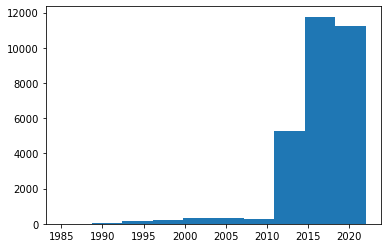

In [10]:
plt.hist(df_carros["ano_de_fabricacao"])

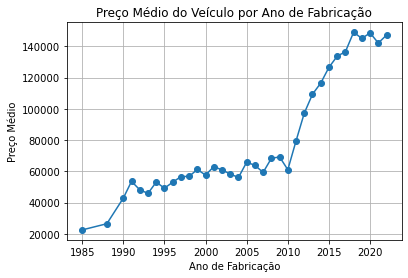

In [11]:
preco_medio_por_ano = df_carros.groupby('ano_de_fabricacao')['preco'].mean()
plt.plot(preco_medio_por_ano.index, preco_medio_por_ano.values, marker='o')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço Médio')
plt.title('Preço Médio do Veículo por Ano de Fabricação')
plt.grid(True)
plt.show()

In [59]:
df_carros['ano_de_fabricacao'].value_counts()

2020    4729
2017    4369
2019    3880
2018    3820
2021    2614
2013    2443
2014    2221
2016    1822
2015    1753
2012     509
2007     121
2008     117
2001      95
2006      88
2010      83
2009      82
2000      81
2002      80
1999      80
2011      75
2003      72
1998      66
2005      62
1997      61
1996      58
2004      55
2022      37
1995      34
1994      31
1993      15
1992      14
1991      10
1990       4
1988       2
1985       1
Name: ano_de_fabricacao, dtype: int64

**O ano de fabricação do veiculo tem uma distribuição desbalanciada. Existe um número maior de carros que foram fabricados a partir de 2010. Outro ponto importante é que esses carros são mais caros comparados com os que foram fabricados antes de 2015.** 

### Preço médio e Estado

<BarContainer object of 25 artists>

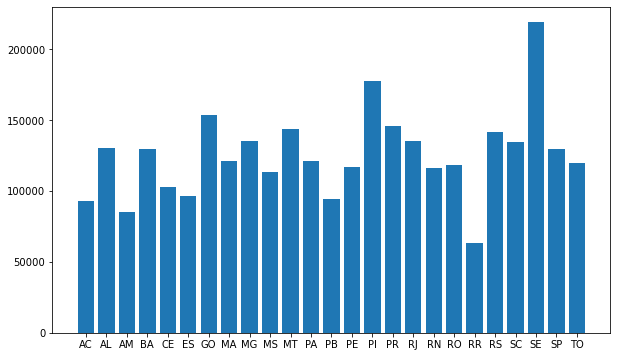

In [12]:
preco_medio_por_estado = df_carros.groupby('estado_vendedor')['preco'].mean()

plt.figure(figsize=(10, 6))
plt.bar(preco_medio_por_estado.index, preco_medio_por_estado.values)

C:\Users\maria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estado_vendedor', ylabel='count'>

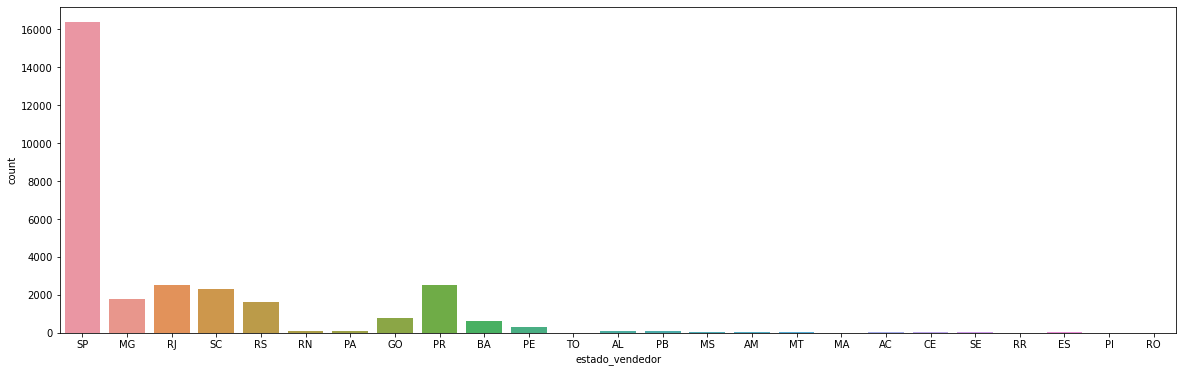

In [16]:
plt.figure(figsize=(20, 6))

sns.countplot(df_carros["estado_vendedor"])

**Existe uma variação no preço dos carros por estado, sendo o Estado de Sergipe com o maior valor médio. Contudo esse dados ele perde um pouco de peso quando o estado de São Paulo tem um número de venda maior que os outros.**

Na primeira linha do df a cidade_vendedor está Rio de Janeiro, mas o estado_vendador está São Paulo. Como está a distribuição de cidades por estado?

In [19]:
cidades_estados = df_carros.groupby('estado_vendedor')['cidade_vendedor'].unique()

cidades_estados

estado_vendedor
AC    [São João de Meriti, Mesquita, Rio Branco, Can...
AL    [Maceió, Goiânia, Rio de Janeiro, Cabo Frio, M...
AM    [Pirenópolis, Manaus, Humaitá, Cidreira, São L...
BA    [Salvador, Rio de Janeiro, Lauro de Freitas, M...
CE    [Fortaleza, Goiânia, Recife, Palmas, São José,...
ES    [Manaus, Frederico Westphalen, Vitória, Joinvi...
GO    [Pouso Alegre, Fortaleza, Goiânia, Joinville, ...
MA                    [São Luís, Palmas, Caxias do Sul]
MG    [Belo Horizonte, Recife, Santa Rita do Sapucaí...
MS    [Campo Grande, Rio de Janeiro, Iguatemi, Marab...
MT    [Belém, São Luís, Cuiabá, Aparecida de Goiânia...
PA    [Belém, Mesquita, Ananindeua, Natal, Serrana, ...
PB    [Rio de Janeiro, João Pessoa, Natal, Campo Gra...
PE    [Recife, Belo Horizonte, Goiânia, Aparecida de...
PI                        [Teresina, Espumoso, Goiânia]
PR    [Belo Horizonte, Curitiba, Quatiguá, Medianeir...
RJ    [Rio de Janeiro, São João de Meriti, Salvador,...
RN    [Natal, Manaus, Salvador, 

A discrição das colunas:

● cidade_vendedor: Contém a cidade em que vendedor do veículo anunciado reside

● estado_vendedor: Contém o estado em que vendedor do veículo anunciado reside

Essas colunas estão com dados complitantes. Não é possivel o vendedor morar na cidade de Salvador e no estado de Tocantins. 

### Preço Médio e marcas populares

As marcas populares foram definidas de acordo com o número de vendas

In [21]:
contagem_marcas = df_carros['marca'].value_counts()
marcas_mais_vendidas = contagem_marcas.head(10)
nomes_marcas_mais_vendidas = marcas_mais_vendidas.index.tolist()

nomes_marcas_mais_vendidas

['VOLKSWAGEN',
 'CHEVROLET',
 'TOYOTA',
 'HYUNDAI',
 'JEEP',
 'FIAT',
 'BMW',
 'AUDI',
 'PEUGEOT',
 'HONDA']

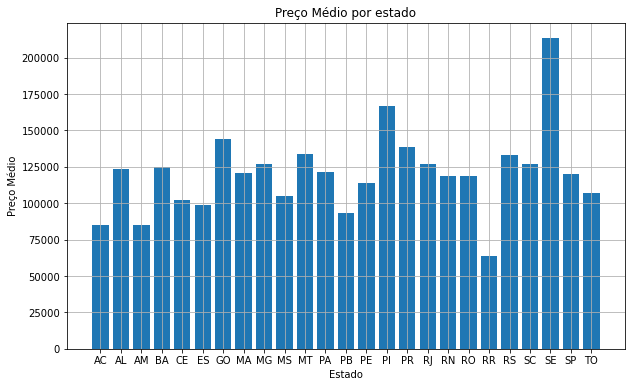

O melhor estado para a venda de um carro popular considerando só o preço é: SE


In [22]:
carros_populares = df_carros[df_carros['marca'].isin(nomes_marcas_mais_vendidas)]
preco_medio_por_estado = carros_populares.groupby('estado_vendedor')['preco'].mean()

plt.figure(figsize=(10, 6))
plt.bar(preco_medio_por_estado.index, preco_medio_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por estado')
plt.grid(True)
plt.show()
melhor_estado_pra_venda = preco_medio_por_estado.idxmax()

print("O melhor estado para a venda de um carro popular considerando só o preço é:", melhor_estado_pra_venda)

**Posso levar em consideração o total de vendas por estado**

O melhor estado para vender um carro de marca popular considerando o número de vendas é: SP


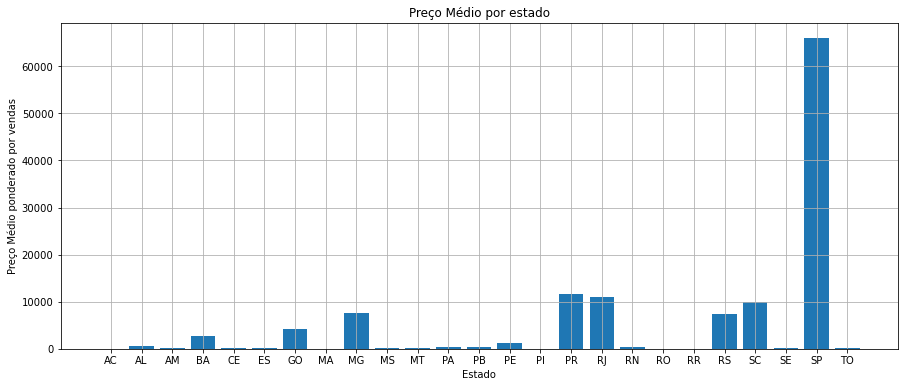

In [23]:
carros_populares = df_carros[df_carros['marca'].isin(nomes_marcas_mais_vendidas)]

preco_medio_por_estado = carros_populares.groupby('estado_vendedor')['preco'].mean()

total_vendas_por_estado = carros_populares.groupby('estado_vendedor').size()

media_ponderada_por_estado = (preco_medio_por_estado * total_vendas_por_estado) / total_vendas_por_estado.sum()

melhor_estado_venda = media_ponderada_por_estado.idxmax()

print("O melhor estado para vender um carro de marca popular considerando o número de vendas é:", melhor_estado_venda)
plt.figure(figsize=(15, 6))
plt.bar(media_ponderada_por_estado.index, media_ponderada_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Preço Médio ponderado por vendas')
plt.title('Preço Médio por estado')
plt.grid(True)
plt.show()
melhor_estado_pra_venda = preco_medio_por_estado.idxmax()

O estado de São Paulo apresenta um número de vendas expressivamente maior em comparação aos outros estados.

Pensei que a coluna cidade_vendedor poderia ter vinculado cidades que não eram do estado de são paulo o que geraria esse número maior de vendas, mas isso ocorreu com todos os estados. Assim vamos olhar apenas para a coluna estado_vendedor.

**Considerando o número de vendas e o preço médio dos carros o melhor estado para vender um carro de marca popular é São Paulo.**

### Anunciante e venda

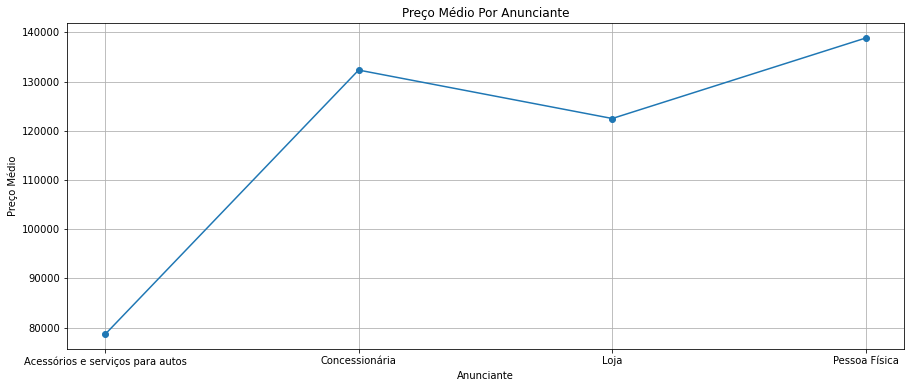

In [24]:
preco_medio_por_anunciante = df_carros.groupby('anunciante')['preco'].mean()

plt.figure(figsize=(15, 6))
plt.plot(preco_medio_por_anunciante.index, preco_medio_por_anunciante.values, marker='o')
plt.xlabel('Anunciante')
plt.ylabel('Preço Médio')
plt.title('Preço Médio Por Anunciante')
plt.grid(True)
plt.show()

(array([1.7999e+04, 0.0000e+00, 0.0000e+00, 9.8790e+03, 0.0000e+00,
        0.0000e+00, 1.7020e+03, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

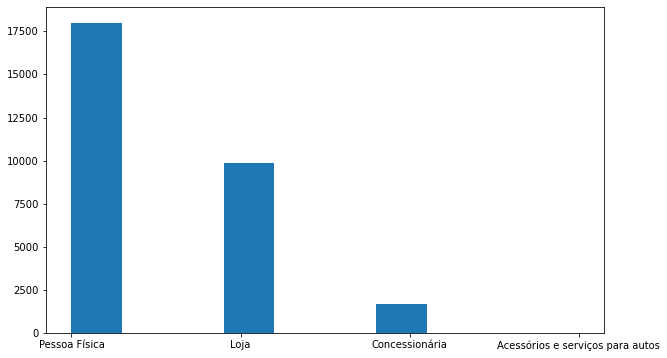

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df_carros["anunciante"])

In [27]:
df_carros["anunciante"].value_counts()

Pessoa Física                       17999
Loja                                 9879
Concessionária                       1702
Acessórios e serviços para autos        4
Name: anunciante, dtype: int64

Existe uma variação no preço médio do carro de acordo com o anunciante. A venda de pessoa física é maior e de Acessórios e serviços para autos é quase insignificante.

### Olhando relação preço e tipo

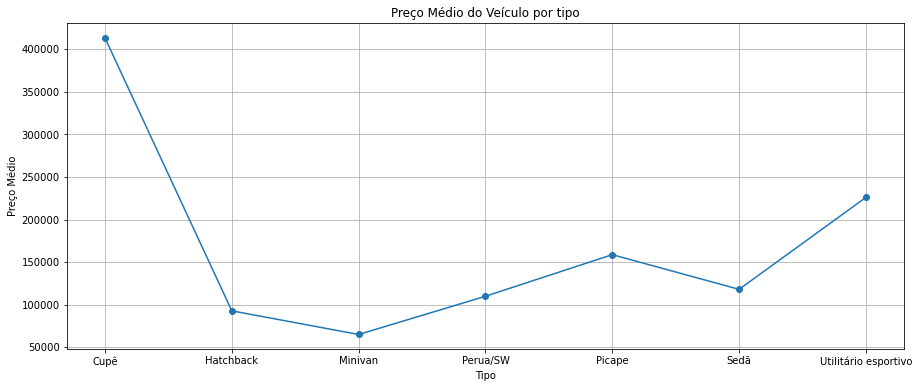

In [28]:
preco_medio_por_tipo = df_carros.groupby('tipo')['preco'].mean()

plt.figure(figsize=(15, 6))
plt.plot(preco_medio_por_tipo.index, preco_medio_por_tipo.values, marker='o')
plt.xlabel('Tipo')
plt.ylabel('Preço Médio')
plt.title('Preço Médio do Veículo por tipo')
plt.grid(True)
plt.show()

In [29]:
df_carros["tipo"].value_counts()

Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Cupê                       26
Minivan                     7
Name: tipo, dtype: int64

Essa variável apresenta uma relação importante com a variável preço, visto que o tipo 'Cupê' tem um valor médio alto comparado com os demais e poucos carrros são desse tipo.

### Relação Preço médio e cambio

<BarContainer object of 7 artists>

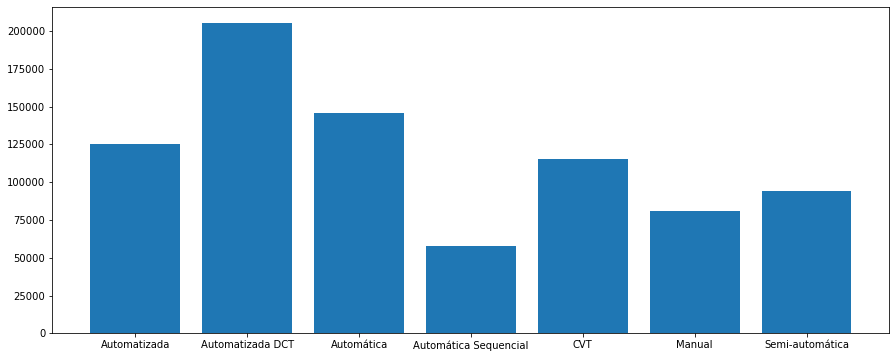

In [30]:
preco_medio_por_num_fotos = df_carros.groupby('cambio')['preco'].mean()

plt.figure(figsize=(15, 6))
plt.bar(preco_medio_por_num_fotos.index, preco_medio_por_num_fotos.values)

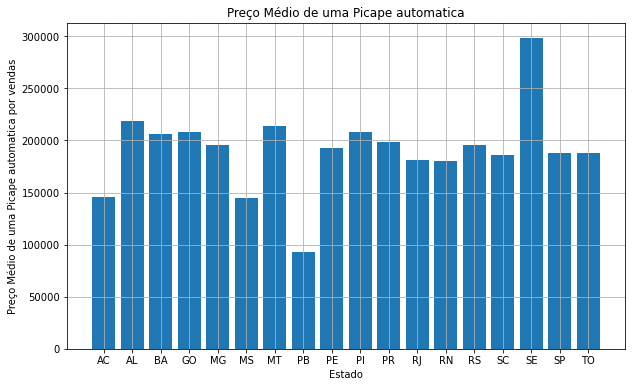

O melhor estado para comprar uma picape automática é: PB
O número de picapes vendidas em PB foi de 3300


In [31]:
picapes_automaticas = df_carros[(df_carros['tipo'] == 'Picape') & (df_carros['cambio'] == 'Automática')]
preco_medio_por_estado = picapes_automaticas.groupby('estado_vendedor')['preco'].mean()
melhor_estado_compra_picape_automatica = preco_medio_por_estado.idxmin()
plt.figure(figsize=(10, 6))
plt.bar(preco_medio_por_estado.index, preco_medio_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Preço Médio de uma Picape automatica por vendas')
plt.title('Preço Médio de uma Picape automatica')
plt.grid(True)
plt.show()
print("O melhor estado para comprar uma picape automática é:", melhor_estado_compra_picape_automatica)
picapes_automaticas_vendidas_no_estado = (picapes_automaticas["estado_vendedor"] == melhor_estado_compra_picape_automatica).shape[0]
print(f"O número de picapes vendidas em {melhor_estado_compra_picape_automatica} foi de {picapes_automaticas_vendidas_no_estado}")

**Levando em consideração o preço médio de uma picape automática o estado com o menor valor é Paraíba, sendo assim o melhor para comprar.**

### Preço médio Garantia de Fábrica e Estado

In [34]:
carros_garantia_fabrica = df_carros[df_carros['garantia_de_fábrica'] == 'Garantia de fábrica']

preco_medest_garantia = carros_garantia_fabrica.groupby('estado_vendedor')['preco'].mean()

melhor_estado_compra_carros_garantia_fabrica = preco_medest_garantia.idxmin()



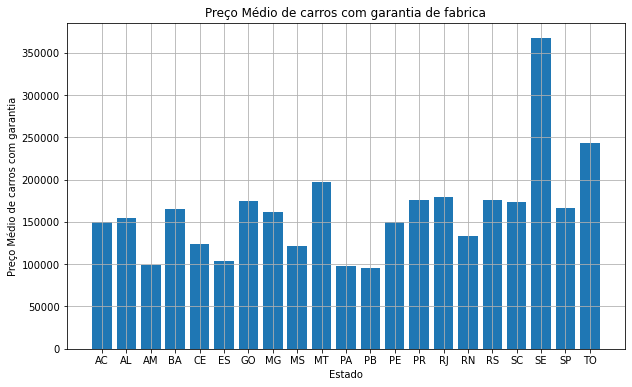

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(preco_medest_garantia.index, preco_medest_garantia.values)
plt.xlabel('Estado')
plt.ylabel('Preço Médio de carros com garantia')
plt.title('Preço Médio de carros com garantia de fabrica')
plt.grid(True)
plt.show()

In [36]:
print("O melhor estado para comprar carros com garantia de fábrica é:", melhor_estado_compra_carros_garantia_fabrica)

O melhor estado para comprar carros com garantia de fábrica é: PB


**Considerando o menor preço o estado da Paraíba é o que apresenta a menor média de preço.**

### Variável fotos e média de preço

<BarContainer object of 14 artists>

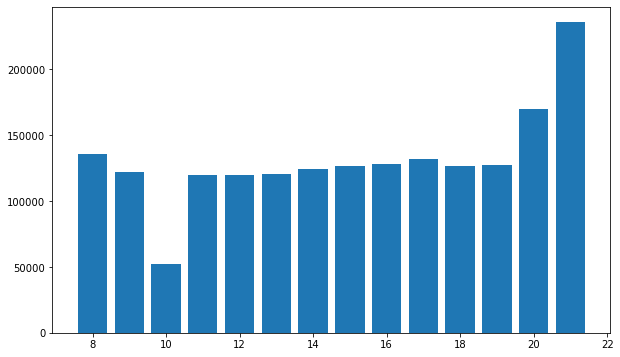

In [37]:
preco_medio_por_num_fotos = df_carros.groupby('num_fotos')['preco'].mean()

plt.figure(figsize=(10, 6))
plt.bar(preco_medio_por_num_fotos.index, preco_medio_por_num_fotos.values)

In [38]:
df_carros['num_fotos'].value_counts()

 8    19420
15     2764
16     2227
14     1811
17      985
 9      728
13      717
20      286
18      248
12      147
19       45
11       21
21        5
10        3
Name: num_fotos, dtype: int64

**Não encontrei uma relação forte**

### Preço médio x hodometro

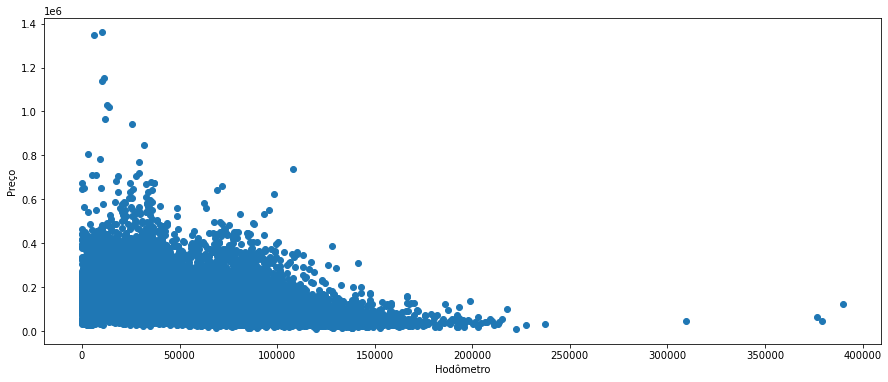

In [39]:
plt.figure(figsize=(15, 6))
plt.scatter(df_carros['hodometro'], df_carros['preco'])


plt.xlabel('Hodômetro')
plt.ylabel('Preço')
plt.show()

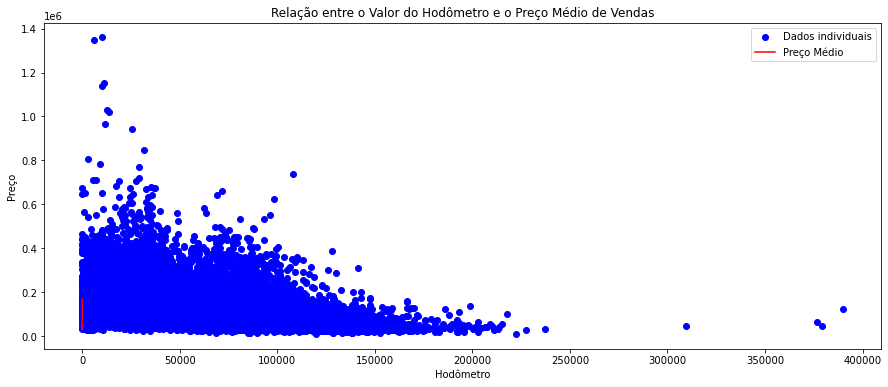

In [40]:

df_carros['faixa_hodometro'] = pd.cut(df_carros['hodometro'], 10, labels=[0,1,2,3,4,5,6,7,8,9], ordered=False) 
preco_medio_por_faixa_hodometro = df_carros.groupby('faixa_hodometro')['preco'].mean()

plt.figure(figsize=(15, 6))

plt.scatter(df_carros['hodometro'], df_carros['preco'], c='blue', label='Dados individuais')
plt.plot(preco_medio_por_faixa_hodometro.index, preco_medio_por_faixa_hodometro.values, c='red', label='Preço Médio')
plt.legend()


plt.xlabel('Hodômetro')
plt.ylabel('Preço')
plt.title('Relação entre o Valor do Hodômetro e o Preço Médio de Vendas')


plt.show()

In [45]:
# Vou retirar essa coluna faixa_hodometro

df_carros = df_carros.drop('faixa_hodometro', axis=1)

### Versão	

In [46]:
df_carros['versao'].value_counts()

1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO                                         1352
2.0 16V FLEX LIMITED AUTOMÁTICO                                                1032
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC                                  757
1.0 200 TSI COMFORTLINE AUTOMÁTICO                                              466
2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO                  429
1.8 16V EVO FLEX FREEDOM AT6                                                    406
1.4 MPFI LS CS 8V FLEX 2P MANUAL                                                357
2.0 SPORT 16V TURBO ACTIVE FLEX 4P AUTOMÁTICO                                   341
2.0 XEI 16V FLEX 4P AUTOMÁTICO                                                  324
1.4 MPI WORKING CS 8V FLEX 2P MANUAL                                            307
2.0 TSI GTI 16V TURBO GASOLINA 4P AUTOMÁTICO                                    306
1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO                                         

**Essa coluna apresenta muita informação. Vou transformar ela para descobrir se a cilindrado tem relação com o valor do carro** 

In [47]:
df_carros['eletrico'] = [1 if 'ELÉTRICO' in c or 'ELECTRIC'in c else 0 for c in df_carros['versao']]

In [48]:
df_carros['eletrico'].value_counts()

0    29514
1       70
Name: eletrico, dtype: int64

In [49]:
for i, c in enumerate(df_carros['versao']):
    novo_valor = c[0:3]
    
    if 'ELÉTRICO' in c or 'ELECTRIC'in c:
        df_carros.iat[i,4] = 0
    
    else:
        df_carros.iat[i,4] = novo_valor

In [51]:
df_carros['versao'].value_counts()

2.0    10340
1.6     4280
1.0     3300
1.4     2706
1.8     2307
1.5     1419
3.0     1294
2.8      897
3.2      644
2.5      279
1.3      220
2.7      195
3.6      189
2.4      184
2.2      175
6.7      164
3.3      158
2.3      128
3.5      105
4.0       99
4.4       79
0         70
5.0       64
6.2       41
3.8       32
1.2       28
2.9       25
4.2       25
4.8       20
5.5       19
4.6       16
1.7       16
3.9       10
5.7        9
0.6        7
2.1        7
3.7        6
4.7        5
4.1        5
4.5        5
4.3        4
4.9        3
5.2        2
1.9        2
5.9        1
Name: versao, dtype: int64

In [52]:
df_carros['versao'] = df_carros['versao'].astype(float)

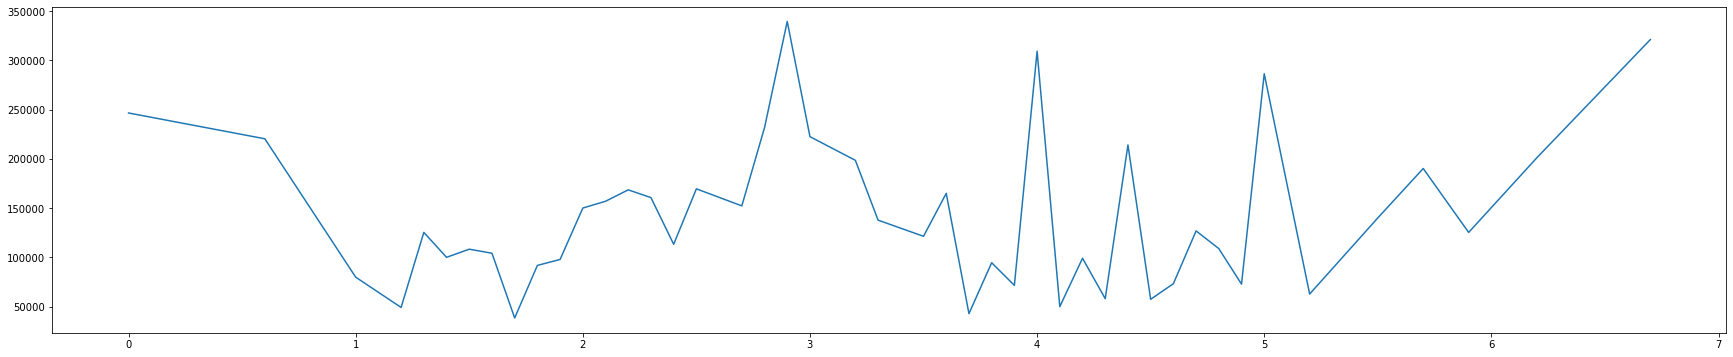

In [55]:
preco_medio_por_versao = df_carros.groupby('versao')['preco'].mean()

plt.figure(figsize=(30, 6))
plt.plot(preco_medio_por_versao.index, preco_medio_por_versao.values)

**Os carros eletricos não tem cilindrada, dessa maneira precisei criar uma nova coluna 'eletrico' para não perder a informação**

# Respostas Hipóteses de Negócio

**1. O valor do carro tem relação com o ano de fabricação? Dessa maneira, carros que foram fabricados a 5 anos atrás tem uma redução considerada no valor de revenda?**

    O ano de fabricação tem um impacto no valor do carro. Carros mais velhos tem valores menores. Existe uma que queda de preço consideravel dos veículos que foram fabricados a 10/ 12 anos atrás. Carros fabricados a partir de 2015 perdem o valor em uma escala menor e gradativa. 

**2. Pessoas sentem mais segurança anunciando por loja ou concessionária ao invés de anunciar como Pessoa Fisica ?**

    O número de anuncio de pessoa física é maior quando comparado ao de loja ou concessionária.

**3. Existe um número maior de anuncios nos Estados do Sudeste ?**

    Os estados de São Paulo, Rio de Janeiro e Minas Gerais estão entre os que mais tem anuncio. O destaque vai para o estado de São Paulo que tem uma expressiva em relação aos demais. Olhando por região as que tem mais anuncio são a região Sudeste e Sul.

**4. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?**

    O melhor estado para a venda de um carro popular considerando só o preço é: Sergipe. Pois tem maior preço médio.

**5. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?**

    O melhor estado para comprar uma picape automática é: Paraíba. Pois tem o menor valor. 

**6. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?**

    O melhor estado para comprar carros com garantia de fábrica é: Paraíba. Pois tem o menor valor. 